In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import numpy.linalg as LA
import implicit
import scipy
from sklearn.decomposition import PCA

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
with open('./data/final_data/company_data_dict.pkl','rb') as f:
    cmpy_dict = pickle.load(f)

In [4]:
def scaler_vals(d_):
    for i in d_:
        scaler = StandardScaler()
        d_[i] = scaler.fit_transform(d_[i])
    return d_

In [5]:
cmpy_dict = scaler_vals(cmpy_dict)

In [7]:
vals = list(cmpy_dict.values())

In [308]:
# def get_recon_error(T,P):
#     return np.mean( np.power( (T-P)  , 2))
def get_recon_error(T,P):
    return np.mean(np.abs(T-P))



0.32996495838486745


In [8]:
def pca_n_recon_error(T , n_components):
    pca = PCA(n_components)
    pca.fit(T)
    recon = pca.inverse_transform(pca.transform(T))
    return get_recon_error(T , recon)

In [10]:
pca = PCA(12)

In [11]:
a = np.random.rand(19,59)

In [12]:
pca.fit(a)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.components_[0]

array([-0.01830397, -0.01710682, -0.094525  , -0.02212713,  0.10645927,
       -0.01158228,  0.01115792,  0.10934531, -0.08403373,  0.0963136 ,
       -0.1532152 ,  0.01008779, -0.07685005,  0.10981028,  0.19779115,
        0.00108662,  0.01581088, -0.09545514,  0.08892531, -0.36798457,
       -0.12446034, -0.12394829, -0.06591826, -0.05781428,  0.123286  ,
        0.02510424,  0.16651184, -0.0151111 ,  0.0226939 ,  0.13052716,
        0.04542064,  0.01760362,  0.3034953 , -0.03841705,  0.08126675,
       -0.06137467,  0.05223713,  0.26267823,  0.28912195,  0.1163434 ,
        0.08702379, -0.03805492,  0.22856705, -0.08239675, -0.10468702,
        0.09929141, -0.18339973,  0.07815975,  0.0787518 , -0.18303932,
       -0.09427448,  0.25671096, -0.00079875, -0.1386504 , -0.16436959,
       -0.09579119, -0.08239356, -0.18305378, -0.05317907])

In [311]:
def get_recon_error_vec(T):
    max_c = np.min(T.shape)
    l = []
    for n_comp in range(1,max_c+1):
        l.append(pca_n_recon_error(T,n_comp))
    return l

In [312]:
all_vecs = []

In [313]:
for i in vals:
    all_vecs.append(get_recon_error_vec(i))

In [259]:
max_n = max([len(x) for x in all_vecs])

In [260]:
max_n

19

In [261]:
all_vecs_new = []
for i in all_vecs:
    if len(i)<19:
        all_vecs_new.append(list(i) + (max_n - len(i))*[i[-1]])
    else:
        all_vecs_new.append(list(i))

In [262]:
vec_var_exp = np.array(all_vecs_new)

In [263]:
vec_var_exp = np.mean(vec_var_exp,0)

In [264]:
vec_var_exp

array([5.04212973e-01, 3.82281740e-01, 3.13007721e-01, 2.60567782e-01,
       2.20479169e-01, 1.88125941e-01, 1.59897175e-01, 1.35625793e-01,
       1.14000251e-01, 9.39587863e-02, 7.62761568e-02, 6.08770625e-02,
       4.74890227e-02, 3.55974257e-02, 2.43618532e-02, 1.39377337e-02,
       4.92744912e-03, 8.70212798e-16, 8.70459190e-16])

In [265]:
len(vec_var_exp)

19

Text(0.5,1,'SVD Reconstruction Error(MAE) vs no. of components')

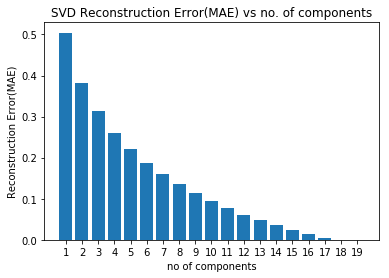

In [268]:
plt.bar( range(len(vec_var_exp)) , vec_var_exp)
plt.xlabel('no of components')
plt.xticks(range(0,19),range(1,20))
plt.ylabel('Reconstruction Error(MAE)')
plt.title('SVD Reconstruction Error(MAE) vs no. of components')

Text(0.5,1,'SVD variance explained vs no. of components')

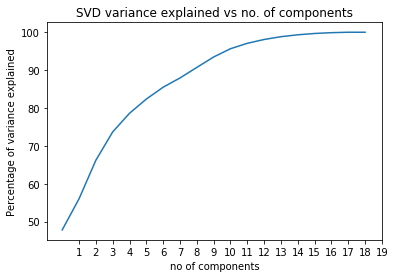

In [149]:
plt.plot(vec_var_exp*100)
plt.xlabel('no of components')
plt.xticks(range(1,20))
plt.ylabel('Percentage of variance explained')
plt.title('SVD variance explained vs no. of components')